# Graphing sEMG data and IMU data
This notebook compares the sEMG data and the motion data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

not_locked = ['time', 'pelvis_rotation', 'lumbar_extension', 'lumbar_bending',
       'lumbar_rotation', 'arm_flex_r', 'arm_add_r', 'arm_rot_r',
       'elbow_flex_r', 'arm_flex_l', 'arm_add_l', 'arm_rot_l', 'elbow_flex_l']

In [2]:
ik_filename = r"C:\Users\chris\Documents\Visualisation\Opensim\Results\23-04-05_1634\ik_generated_quat_file.mot"
semg_data_filename=r"C:\Users\chris\Documents\Visualisation\Opensim\Results\23-04-05_1634\semg_data.npy"

ik_data = pd.read_csv(ik_filename,sep='\t',skiprows=6)
semg_data = np.load(semg_data_filename)

Only keep joints which are not locked, and show the data

In [3]:
ik_filtered = ik_data[not_locked] 
ik_filtered.head()

,time,pelvis_rotation,lumbar_extension,lumbar_bending,lumbar_rotation,arm_flex_r,arm_add_r,arm_rot_r,elbow_flex_r,arm_flex_l,arm_add_l,arm_rot_l,elbow_flex_l
0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.02,0.005390,-0.042480,-0.020837,0.063645,-0.280525,-0.166446,0.134518,0.619188,-0.330298,-0.057376,0.076449,0.593032
2,0.04,0.044153,0.044371,-0.097567,0.156323,-0.470787,-0.141048,0.233665,0.605475,-0.477069,-0.121476,0.183396,0.584320
3,0.06,0.044385,-0.229688,0.033140,0.186325,-0.263654,-0.388253,0.143428,0.677031,-0.330381,0.052947,0.243485,0.609725
4,0.08,0.073476,-0.252447,0.012114,0.208767,-0.338145,-0.453183,0.192518,0.719583,-0.385874,0.030934,0.250092,0.596193


In [4]:
(ik_filtered.max() - ik_filtered.min()).sort_values(ascending=False)

elbow_flex_l        82.552373
elbow_flex_r        77.048552
lumbar_extension    68.777826
pelvis_rotation     67.889445
arm_add_r           41.266249
lumbar_rotation     34.177762
arm_rot_r           29.536484
arm_flex_l          25.622812
arm_rot_l           22.454075
arm_flex_r          20.560929
arm_add_l           18.788567
lumbar_bending      14.930652
time                 9.740000
dtype: float64

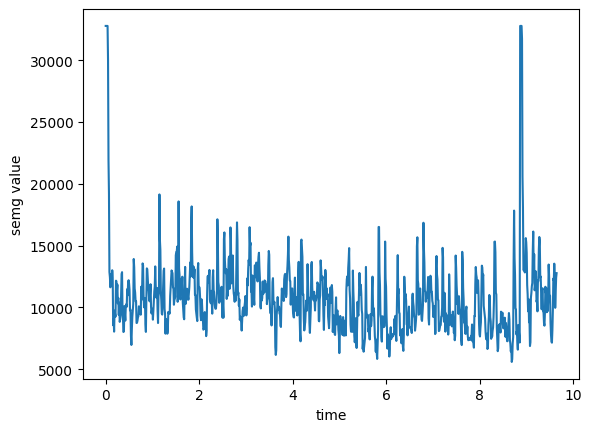

In [5]:
dt = ik_data['time'].max() / semg_data.shape[0]
dt = round(dt,3)
time_semg = [t*dt for t in range(semg_data.shape[0])]

plt.xlabel("time")
plt.ylabel("semg value")

plt.plot(time_semg,semg_data)
plt.show()

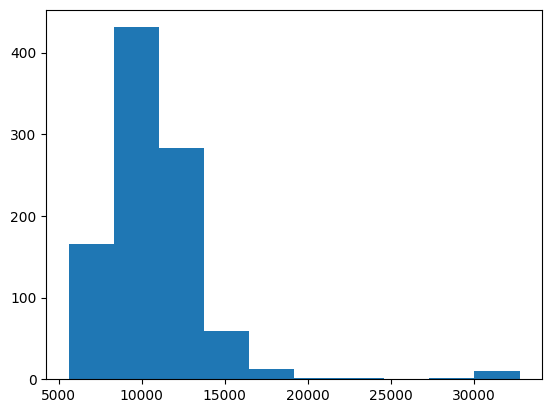

In [6]:
counts, bins = np.histogram(semg_data)
plt.stairs(counts, bins,fill=True)
plt.show()

Plotting a line graph of the data allows us to conclude that there are some outliers that can be removed. The histogram tells us where these outliers are generally to be. Hence, we will find the index of numbers above 30000, and then replace them with median values. The number zero will be replaced as well

In [7]:
filtered_semg = pd.DataFrame(semg_data)
to_replace = list(filtered_semg[filtered_semg[0]>30000].index)
to_replace_0 = list(filtered_semg[filtered_semg[0]<4000].index)
median = np.median(semg_data)
for i in to_replace+to_replace_0:
    filtered_semg.iloc[i] = median



Try moving average to see the general shape of the data

In [8]:
size = 10

x = [np.median(semg_data)] * size
mov_avg = []
pos = 0
for index in range(semg_data.shape[0]):
    x[pos] = filtered_semg.iloc[index]
    mov_avg.append(sum(x)/size)
    pos = (pos+1)%size

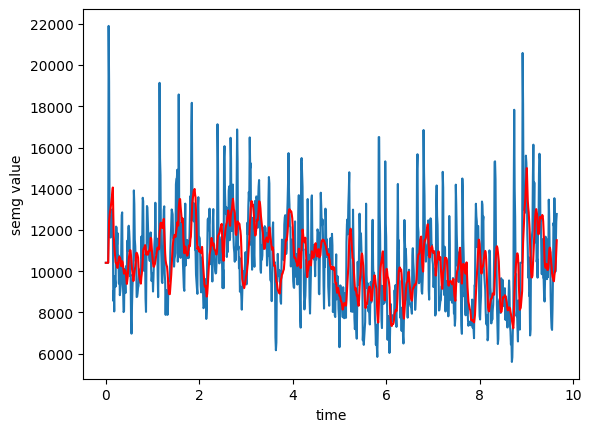

In [9]:
dt = ik_data['time'].max() / semg_data.shape[0]
dt = round(dt,3)
time_semg = [t*dt for t in range(semg_data.shape[0])]

plt.xlabel("time")
plt.ylabel("semg value")

plt.plot(time_semg,filtered_semg)
plt.plot(time_semg,mov_avg,color="red")
plt.show()

In [10]:
# create figure and axis objects with subplots()
def compare_semg_jointangle(joint_angle,plot_semg = True, use_mov_avg = False):

        fig,ax = plt.subplots()
        # make a plot
        ax.plot(ik_filtered['time'],
                ik_filtered[joint_angle],
                color="red")
        # set x-axis label
        ax.set_xlabel("time_stamp", fontsize = 14)
        # set y-axis label
        ax.set_ylabel("pelvis_rotation",color="red",fontsize=14)


        if plot_semg:
                # twin object for two different y-axis on the sample plot
                ax2=ax.twinx()
                # make a plot with different y-axis using second axis object
                dt = ik_data['time'].max() / semg_data.shape[0]
                dt = round(dt,3)
                time_semg = [t*dt for t in range(semg_data.shape[0])]
                if use_mov_avg:
                        ax2.plot(time_semg, mov_avg,color="blue")
                else:
                        ax2.plot(time_semg, filtered_semg,color="blue")
                ax2.set_ylabel("semg_data",color="blue",fontsize=14)

        plt.title("Graph of " + joint_angle +" against time")
        plt.show()

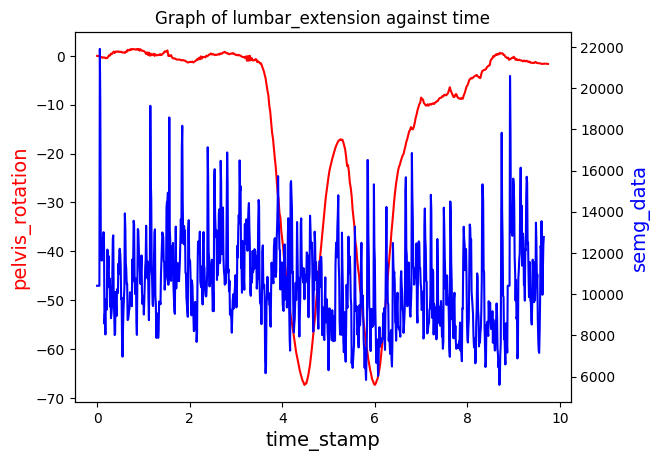

In [11]:
compare_semg_jointangle("lumbar_extension",use_mov_avg=False)

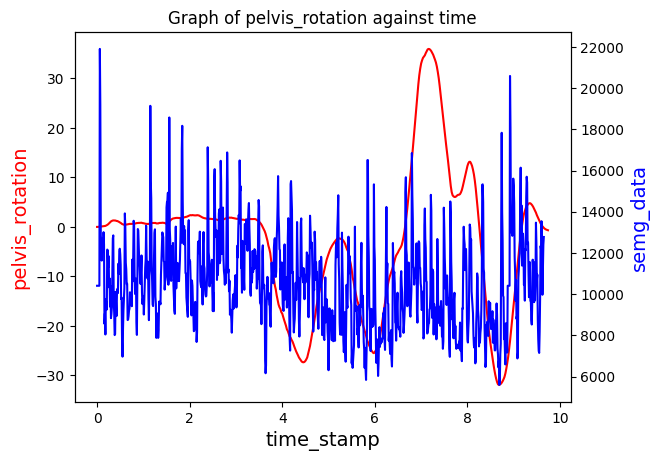

In [12]:
compare_semg_jointangle("pelvis_rotation",use_mov_avg=False)